In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline 
sns.set(style="ticks")

In [109]:
data = pd.read_csv('doctor_who.csv')
data

,idx,text,type,details,episodeid,doctorid
0,0,Sylvest home,location,NaN,21-7,6
1,1,Twin boys are playing a cross between chess an...,context,NaN,21-7,6
2,2,Where's mother?,talk,REMUS,21-7,6
3,3,She's busy.,talk,SYLVEST,21-7,6
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6
...,...,...,...,...,...,...
319842,1199,"Everyone say Hi! to ColinBaker, channelling Wi...",context,NaN,21-6,5
319843,1200,"I, I, I.",talk,PERI,21-6,5
319844,1201,That's three I's in one breath. Makes you sou...,talk,DOCTOR,21-6,5
319845,1202,What's happened?,talk,PERI,21-6,5


In [110]:
data = data.drop(columns = ['idx', 'type','details','episodeid'])
data

,text,doctorid
0,Sylvest home,6
1,Twin boys are playing a cross between chess an...,6
2,Where's mother?,6
3,She's busy.,6
4,Does that mean she isn't talking to us?,6
...,...,...
319842,"Everyone say Hi! to ColinBaker, channelling Wi...",5
319843,"I, I, I.",5
319844,That's three I's in one breath. Makes you sou...,5
319845,What's happened?,5


In [111]:
data.isnull().sum()

text        14
doctorid     0
dtype: int64

In [112]:
data = data.dropna(axis=0, how='any')
data.isnull().sum()

text        0
doctorid    0
dtype: int64

In [113]:
data['doctorid'].value_counts()

4     62006
1     39508
3     39440
2     38687
10    31383
11    26865
5     25050
12    14559
7     14080
6     13950
9      6980
13     6116
8      1209
Name: doctorid, dtype: int64

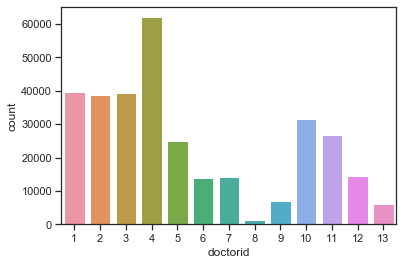

In [114]:
sns.countplot(data['doctorid'])

In [115]:
X = data.drop('doctorid', axis=1)
Y = data['doctorid']

In [116]:
X

,text
0,Sylvest home
1,Twin boys are playing a cross between chess an...
2,Where's mother?
3,She's busy.
4,Does that mean she isn't talking to us?
...,...
319842,"Everyone say Hi! to ColinBaker, channelling Wi..."
319843,"I, I, I."
319844,That's three I's in one breath. Makes you sou...
319845,What's happened?


In [117]:
Y

0         6
1         6
2         6
3         6
4         6
         ..
319842    5
319843    5
319844    5
319845    5
319846    5
Name: doctorid, Length: 319833, dtype: int64

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(223883, 1), (95950, 1)
(223883,), (95950,)


In [119]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train + X_test)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [120]:
X_train

,text
119339,"Oh, good. Great. I think."
233297,"This is a friend of mine, Griff."
225971,But brand new.
133933,"But what happens then, Doctor? If it takes th..."
205207,"Thanks, mates. And now, a romantic number fro..."
...,...
117590,Right! Fine! I don't want you here anyway! Wh...
73355,Brigadier
312215,"Freeze, Sarah Jane. If you move, we're dead."
267349,"You weren't with us, Chesterton, but every in..."


In [121]:
X_train_vec = vectorizer.transform(X_train['text'])
X_test_vec = vectorizer.transform(X_test['text'])

In [122]:
X_train_vec.shape

(223883, 1)

In [123]:
def test(model):
    print(model)
    model.fit(X_train_vec, Y_train)
    print("accuracy:", accuracy_score(Y_test, model.predict(X_test_vec)))

In [124]:
test(LogisticRegression(solver='lbfgs', multi_class='auto'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy: 0.19519541427826992


In [125]:
test(LinearSVC())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
accuracy: 0.19519541427826992


In [126]:
test(MultinomialNB())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy: 0.19519541427826992


In [127]:
test(ComplementNB())

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
accuracy: 0.12190724335591453


In [128]:
test(BernoulliNB())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
accuracy: 0.19519541427826992
